In [163]:
# author: 0712238, Yan-Tong Lin
# usage: SVD image compression for LA 2020 spring, MS Kang - HW9 problem 4(original problem want k=50)
# expected input: (3, n, n) image
# reference: google, stackexchange, numpy doc

In [130]:
import numpy as np
from matplotlib import pyplot as plt

In [131]:
image = plt.imread("./Lenna_(test_image).png")
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


In [132]:
RGB = np.transpose(image, (2, 0, 1))
RGB.shape

(3, 512, 512)

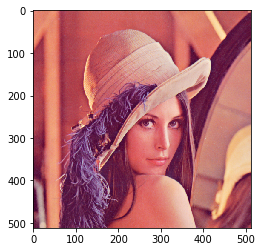

In [133]:
def displayImage(image):
    plt.imshow(image)
    plt.show()
displayImage(image)

In [134]:
SVDs = []

for i in range(3):
    SVDs.append(np.linalg.svd(RGB[i]))

In [135]:
SVDs[0][0].shape

(512, 512)

In [136]:
np.diag(SVDs[0][1]).shape

(512, 512)

In [137]:
U = SVDs[0][0]
S = np.diag(SVDs[0][1])
V = SVDs[0][2]
(U@S@V).shape

(512, 512)

In [138]:
U@S@(V) - RGB[0]

array([[ 1.7881393e-07,  1.7881393e-07,  7.1525574e-07, ...,
        -1.7881393e-07,  1.7881393e-07,  2.3841858e-07],
       [ 1.7881393e-07,  1.7881393e-07,  7.1525574e-07, ...,
        -1.7881393e-07,  1.7881393e-07,  2.3841858e-07],
       [ 1.7881393e-07,  1.7881393e-07,  7.1525574e-07, ...,
        -1.7881393e-07,  1.7881393e-07,  2.3841858e-07],
       ...,
       [ 2.9802322e-08,  2.9802322e-08, -5.9604645e-08, ...,
        -2.9802322e-07,  1.1920929e-07, -2.3841858e-07],
       [-8.9406967e-08, -8.9406967e-08,  1.1920929e-07, ...,
         0.0000000e+00, -5.9604645e-08, -6.5565109e-07],
       [-8.9406967e-08, -8.9406967e-08,  1.1920929e-07, ...,
         0.0000000e+00, -5.9604645e-08, -6.5565109e-07]], dtype=float32)

In [139]:
 U@S@(V.T)

array([[ 0.8438206 ,  0.9824439 ,  0.87783265, ..., -0.19816665,
         0.05222019,  0.1336288 ],
       [ 0.8438206 ,  0.9824439 ,  0.87783265, ..., -0.19816665,
         0.05222019,  0.1336288 ],
       [ 0.8438206 ,  0.9824439 ,  0.87783265, ..., -0.19816665,
         0.05222019,  0.1336288 ],
       ...,
       [ 0.64406675,  0.8398742 ,  0.7293095 , ..., -0.28530267,
         0.3908277 ,  0.03303262],
       [ 0.6350971 ,  0.84897953,  0.7355046 , ..., -0.30195877,
         0.4040182 ,  0.0448729 ],
       [ 0.6350971 ,  0.84897953,  0.7355046 , ..., -0.30195877,
         0.4040182 ,  0.0448729 ]], dtype=float32)

In [140]:
# want square input
def SVD_compression(A, k=50):
    SVD = np.linalg.svd(A)
    U = SVD[0]
    S = np.diag(SVD[1])
    VT = SVD[2]
    kU = SVD[0][:, :k]
    kS = np.diag(SVD[1][:k])
    kVT = SVD[2][:k, :]
    #print(k, kU.shape, kS.shape, kVT.shape)
    R = kU@kS@(kVT)
    return R

In [141]:
SVD_compression(RGB[0], k=50).shape

(512, 512)

In [161]:
def image_SVD_compression(img, k=50):
    RGB = np.transpose(img, (2, 0, 1))
    
    kRGB = [0]*3
    for i in range(3):
        kRGB[i] = SVD_compression(RGB[i], k)
        
    kRGB = np.asarray(kRGB)
    # print(kRGB.shape)
    kimg = np.transpose(kRGB, (1, 2, 0))
    # np.clip(kimg, 0.001, 0.999)
    print("Compression with first " + str(k) + " singular values")
    print("Compression rate = " + str(k/kimg.shape[1]))

    plt.imshow(kimg)
    plt.show()
    return kimg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Compression with first 20 singular values
Compression rate = 0.0390625


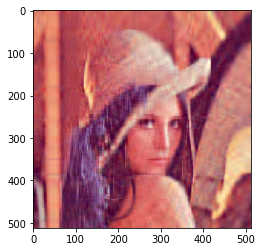

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Compression with first 50 singular values
Compression rate = 0.09765625


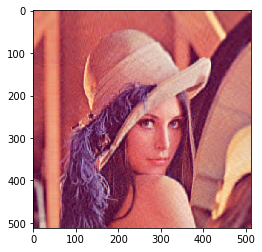

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Compression with first 512 singular values
Compression rate = 1.0


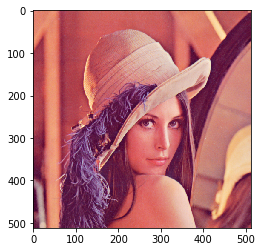

[]

In [162]:
image_SVD_compression(image, k=20)
image_SVD_compression(image, k=50)
image_SVD_compression(image, k=512)
[]